In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 加载数据
train = pd.read_csv('../train.csv')
# 查看数据的基本信息
train.head()

C:\Users\19234\AppData\Local\Temp\ipykernel_56536\4058387974.py:8: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [13]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [14]:
def pre_process(X):
    # 将所有类别变量编码为数值类型
    label_encoders = {}
    for column in train.columns:
        if X[column].dtype == 'object':
            X[column] = X[column].astype(str) #先转换类型
            label_encoders[column] = LabelEncoder()
            X[column] = label_encoders[column].fit_transform(X[column])

    X.fillna(0,inplace=True)
    return pd.DataFrame(X.drop("Credit_Score", axis=1)),pd.DataFrame(X["Credit_Score"])

X,y=pre_process(train)
X.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,16406,12320,3,84,308,10205,12,6011,1824.843333,3,...,4.0,3,12062,26.822620,180,1,49.574949,81513,3,42380
1,16417,12320,2,84,308,10205,12,6011,0.000000,3,...,4.0,1,12062,31.944960,404,1,49.574949,7661,4,31503
2,16428,12320,6,84,0,10205,12,6011,0.000000,3,...,4.0,1,12062,28.609352,184,1,49.574949,82226,5,48639
3,16441,12320,0,84,308,10205,12,6011,0.000000,3,...,4.0,1,12062,31.377862,185,1,49.574949,30358,6,11593
4,16452,12320,7,84,308,10205,12,6011,1824.843333,3,...,4.0,1,12062,24.797347,186,1,49.574949,55363,2,51834


定义了pre_process函数，用于处理分类数据和缺失值：
将所有分类数据转换为字符串并应用LabelEncoder进行编码。
缺失值被填充为0。

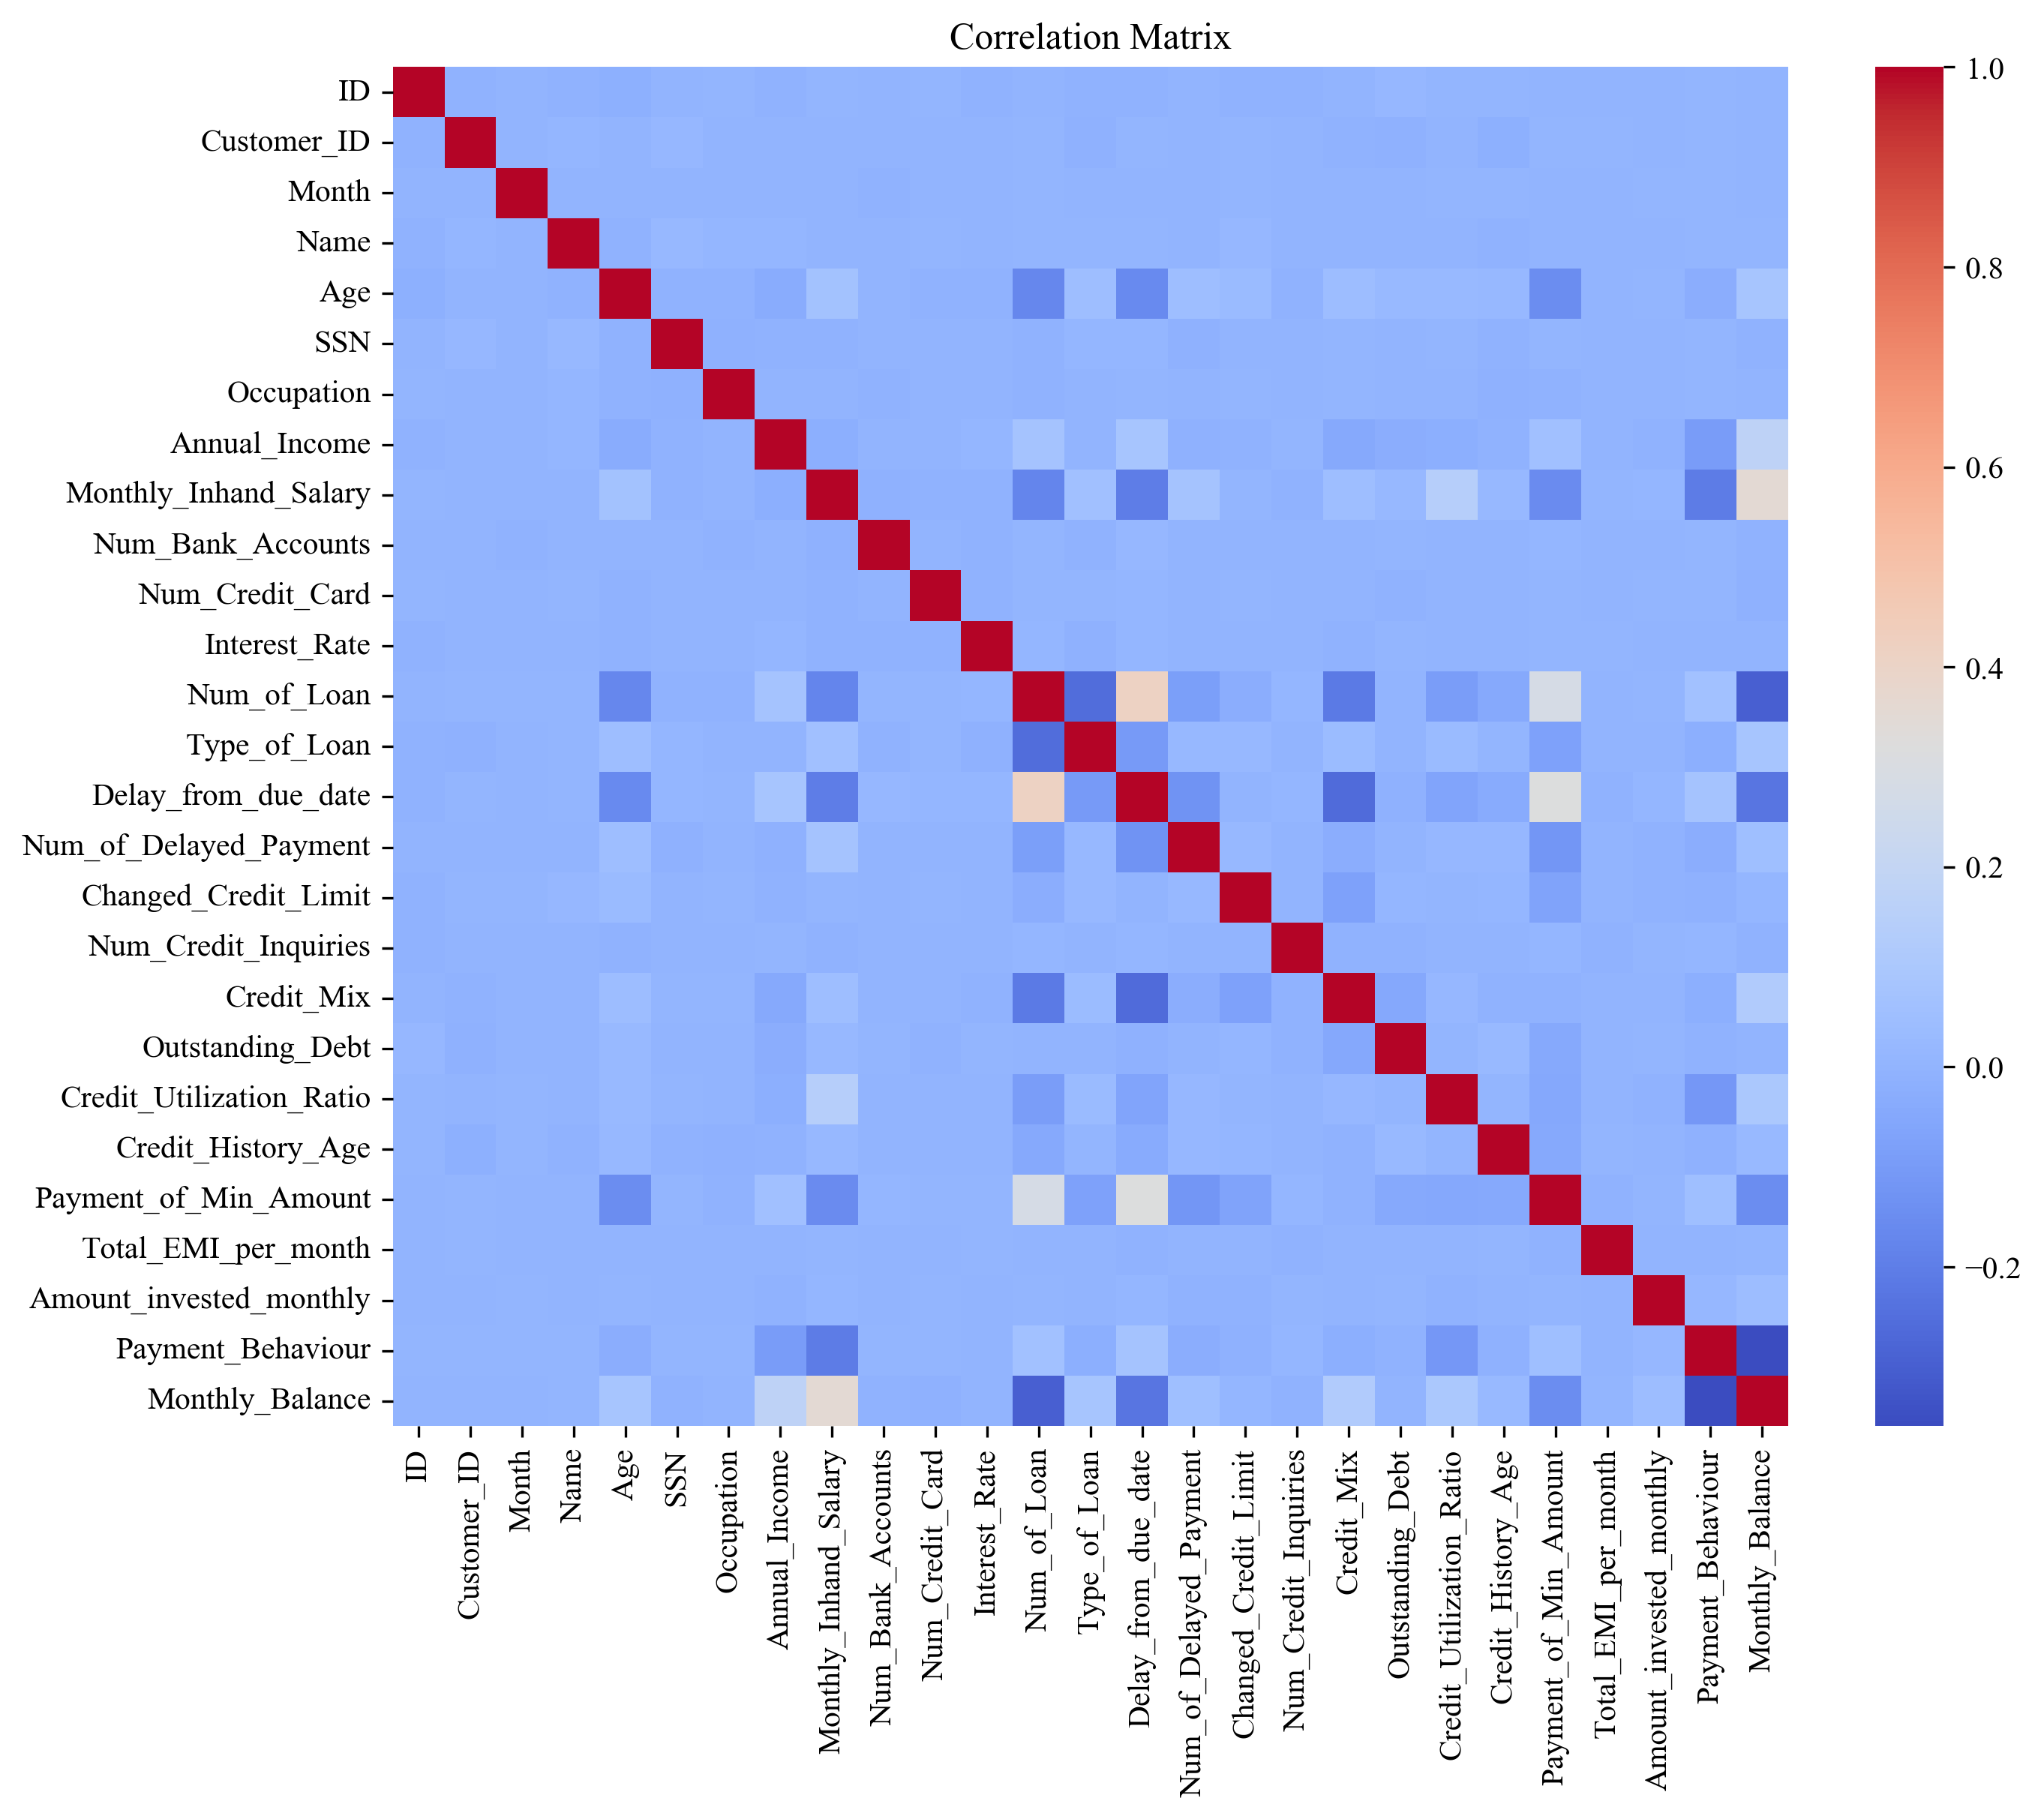

In [15]:
# 划分训练集和测试集
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8),dpi=300)
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

使用seaborn库的热力图可视化了数据集中特征的相关性矩阵。
绘制了模型预测值与实际值的对比图，以评估模型性能。

手动选特征

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf0 = RandomForestRegressor(n_estimators=100, random_state=42)

my_features = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 
                   'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan']
rf0.fit(X_train[my_features], y_train)
rf0_pred = rf0.predict(X_test[my_features])
rf0_mse = mean_squared_error(y_test, rf0_pred)
print(f"手动选择的 MSE: {rf0_mse}")

C:\Users\19234\AppData\Local\Temp\ipykernel_56536\245628489.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf0.fit(X_train[my_features], y_train)


手动选择的 MSE: 0.36289551724521446


使用树模型筛选

In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
model_features = X_train.columns[indices[:len(my_features)]]
X_model = X_train[model_features]
print("手动选择特征:", my_features)
print("树模型筛选特征:", model_features.tolist())

C:\Users\19234\AppData\Local\Temp\ipykernel_56536\2171607427.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


手动选择特征: ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan']
树模型筛选特征: ['Credit_Mix', 'Interest_Rate', 'ID', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Changed_Credit_Limit']


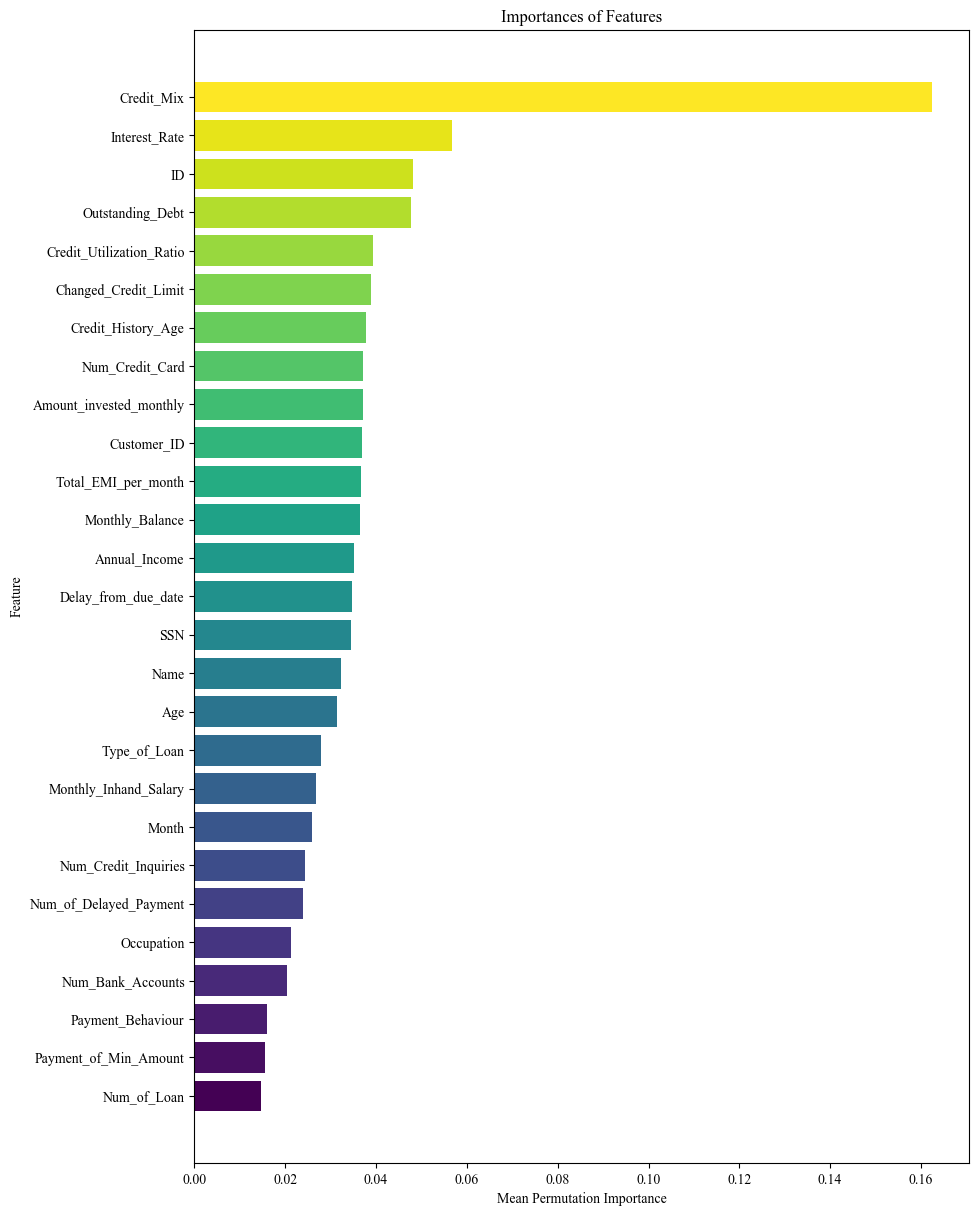

In [18]:
# 排序
sorted_indices = np.argsort(importances)
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_feature_names)))

# 可视化重要性
plt.figure(figsize=(10, 15),dpi=100)
plt.barh(sorted_feature_names, sorted_importances, color=colors)
plt.xlabel('Mean Permutation Importance')
plt.ylabel('Feature')
plt.title('Importances of Features')
plt.show()

这里有点问题 理论上ID重要性不大

用随机森林进行回归

In [19]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train[model_features], y_train) 

rf_pred = rf.predict(X_test[model_features])
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"树模型筛选的 MSE: {rf_mse}")

C:\Users\19234\AppData\Local\Temp\ipykernel_56536\3153901026.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train[model_features], y_train)


树模型筛选的 MSE: 0.37975446500000004


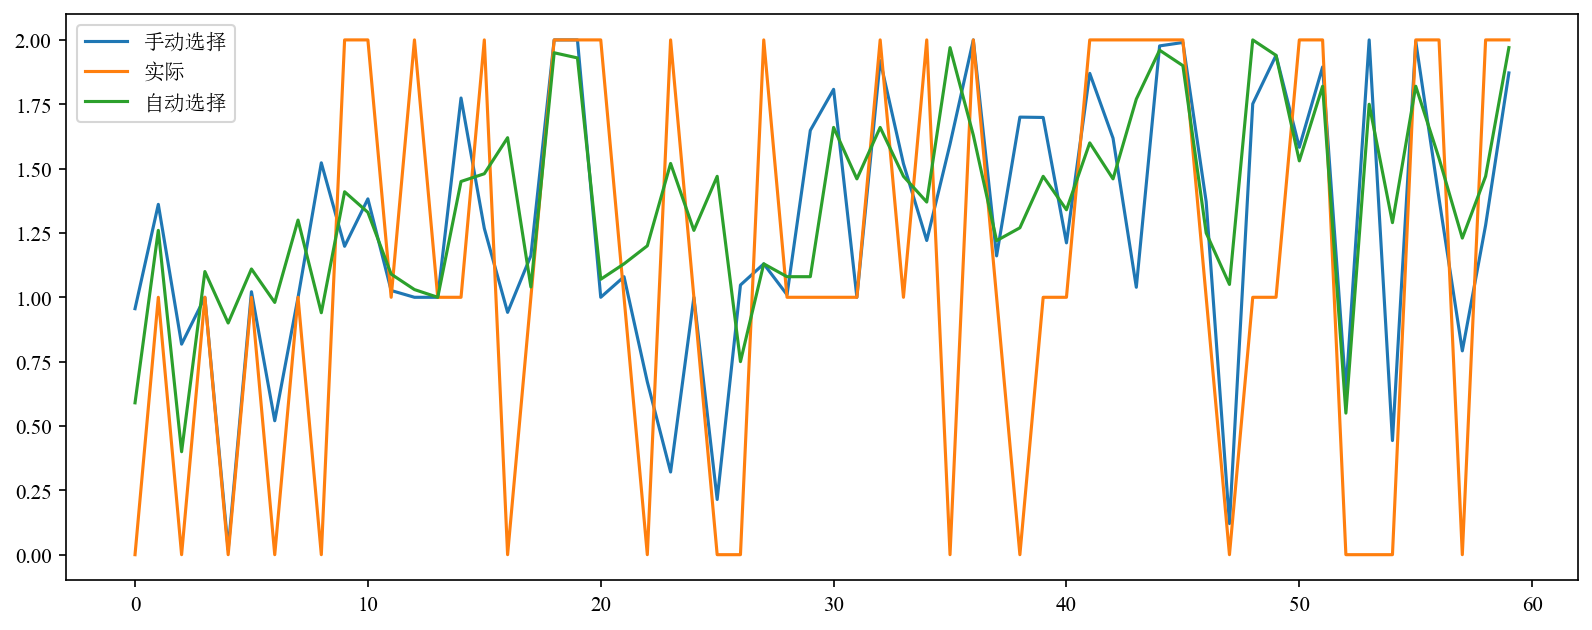

In [46]:
pred = pd.DataFrame()

pred['手动选择'] = rf0_pred
pred['实际'] = y_test.values
pred['自动选择'] = rf_pred
plt.figure(dpi=150,figsize=(13,5))
plt.plot(pred.iloc[:60],label=pred.columns)
plt.legend()

## t-SNE

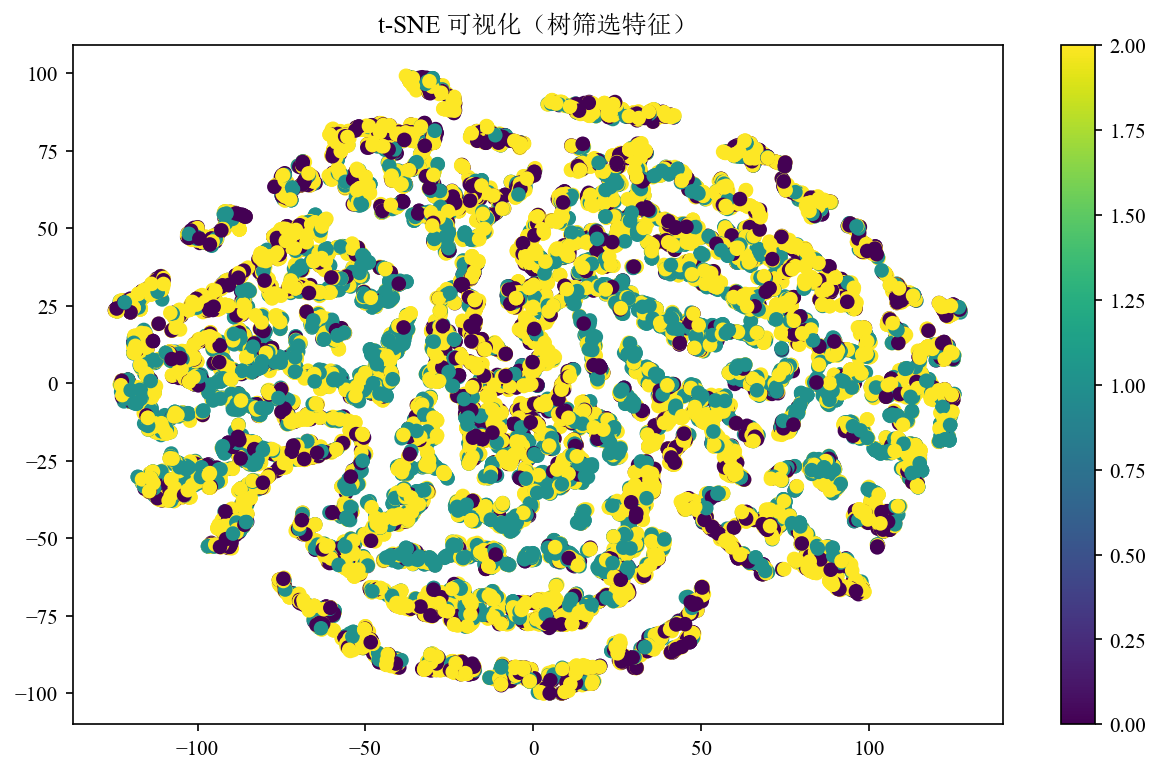

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42) # 二维空间
X_tsne = tsne.fit_transform(X_test[model_features])

plt.figure(figsize=(10, 6),dpi=150)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test.to_numpy().ravel(), cmap='viridis')
plt.colorbar()
plt.title('t-SNE 可视化（树筛选特征）')
plt.show()

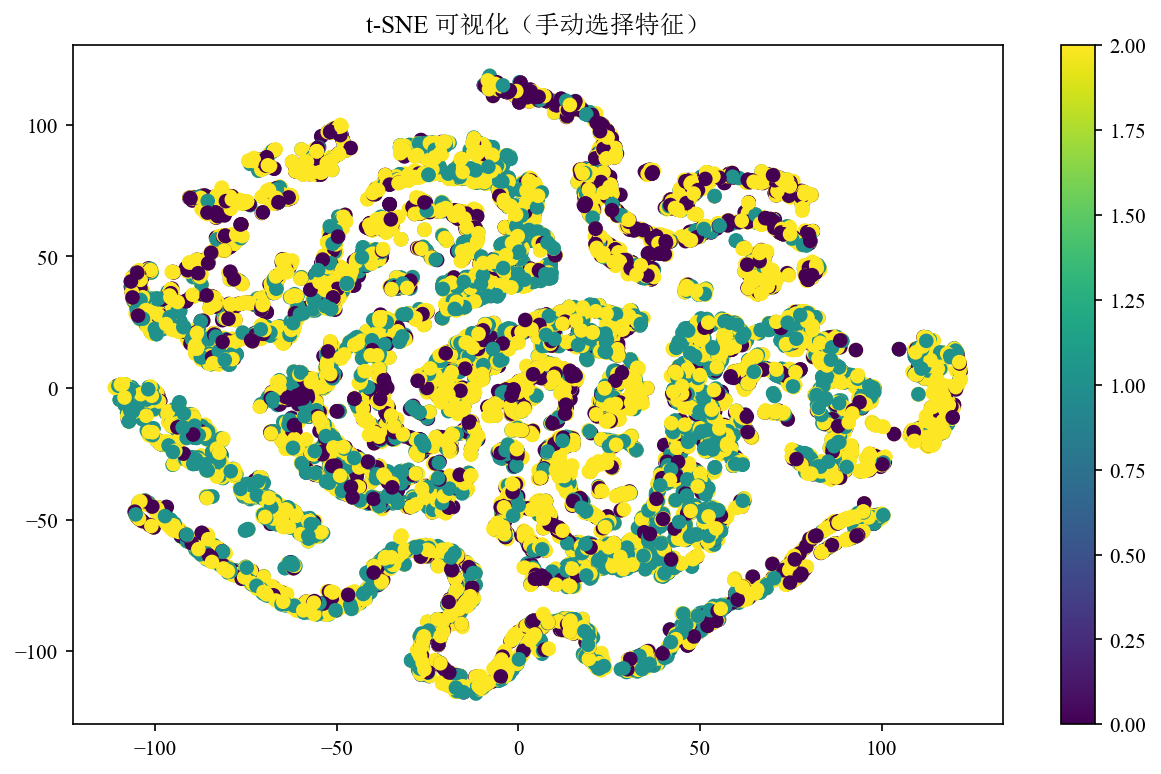

In [49]:
# 手动选择特征
tsne = TSNE(n_components=2, random_state=42) # 二维空间
X_tsne = tsne.fit_transform(X_test[my_features])

plt.figure(figsize=(10, 6),dpi=150)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test.to_numpy().ravel(), cmap='viridis')
plt.colorbar()
plt.title('t-SNE 可视化（手动选择特征）')
plt.show()

应用了t-SNE算法对高维特征空间进行降维，以二维散点图的形式可视化数据，可以看出手动选择效果较好

手动选择的MSE值为：
MSE: 0.36289551724521446

树模型筛选的MSE值为：
MSE: 0.37975446500000004